In [7]:
#Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, log_loss
import math
from sklearn.preprocessing import LabelEncoder
!pip install scikit-plot
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import time

In [8]:
df = pd.read_csv('Project.csv')
df.head()

,c/c++,java,python,wt,dbms,se,ds,algo,math,stats,project
0,4,4,4,3,4,4,4,4,4,4,AI
1,4,3,4,3,5,5,4,3,3,4,AI
2,3,3,3,3,3,5,5,5,2,4,WA
3,4,3,5,3,4,5,3,3,4,4,Cloud
4,5,2,5,3,4,5,5,5,3,3,Others


In [9]:
X = df.drop(columns=(['project']))
y = df['project']  
le = LabelEncoder()
y = le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
print("Obtained accuracy of KNN Algorithm : ",accuracy_score(rf.predict(X_test),y_test)*100,"%")
y_pred = rf.predict(X_test)
print("R2 Value                           :",round(r2_score(y_test,y_pred),2))
print("Log loss                           : ",round(log_loss(y_test, rf.predict_proba(X_test)),2))
print("Mean Squared Error                 : ",round(mean_squared_error(y_test,y_pred),2))



Obtained accuracy of KNN Algorithm :  41.25 %
R2 Value                           : -0.5
Log loss                           :  2.0
Mean Squared Error                 :  9.61


In [10]:
# Confusion Matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[ 5,  2,  1,  0,  3,  1, 10],
       [ 1,  0,  0,  0,  0,  0,  2],
       [ 2,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1],
       [ 3,  1,  0,  0,  2,  0,  2],
       [ 4,  1,  2,  0,  1,  1,  3],
       [ 1,  0,  0,  1,  2,  2, 24]])

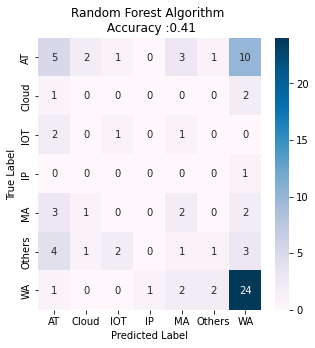

In [11]:
#Heatmap

cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm, index = ['AT','Cloud','IOT','IP','MA','Others','WA'],
                         columns = ['AT','Cloud','IOT','IP','MA','Others','WA'])
plt.figure(figsize=(5,5))
sns.heatmap(cm_df,annot=True, cmap='PuBu')
plt.title('Random Forest Algorithm \n Accuracy :{0:.2f}'.format(accuracy_score(y_test,y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [12]:
# Classification Report
print("Classification Report \n",classification_report(y_test, y_pred,target_names = ['AT','Cloud','IOT','IP','MA','Others','WA']))

Classification Report 
               precision    recall  f1-score   support

          AT       0.31      0.23      0.26        22
       Cloud       0.00      0.00      0.00         3
         IOT       0.25      0.25      0.25         4
          IP       0.00      0.00      0.00         1
          MA       0.22      0.25      0.24         8
      Others       0.25      0.08      0.12        12
          WA       0.57      0.80      0.67        30

    accuracy                           0.41        80
   macro avg       0.23      0.23      0.22        80
weighted avg       0.37      0.41      0.38        80



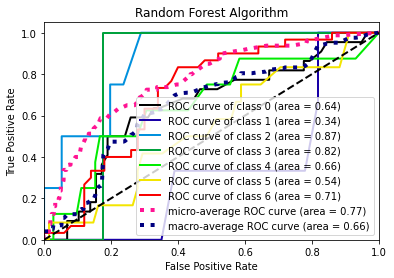

In [13]:
#ROC Curve

skplt.metrics.plot_roc_curve(y_test, rf.predict_proba(X_test))
plt.title("Random Forest Algorithm")
plt.show()

In [14]:
#Prediction

input1 = [3,4,5,2,4,5,3,4,5,3]
input2 = [5,5,5,1,4,5,3,5,5,3]
input3 = [4,4,2,1,4,2,2,1,1,1]
input4 = [4,4,2,1,4,2,2,1,1,1]
input5 = [1,4,2,1,1,2,2,1,1,1]
input6 = [5,5,5,3,2,2,2,5,2,5]
input7 = [5,5,2,1,2,2,2,1,1,1]
inputs = [input1,input2,input3,input4,input5,input6,input7]
for input in inputs:
    print("Input  : ",input)
    input = np.reshape(input,(1,10))
    cls = rf.predict(input)  
    if cls == 0:
        print("Output :  AI")
    elif cls == 1:
        print("Output :  Cloud")
    elif cls == 2:
        print("Output :  IOT")
    elif cls == 3:
        print("Output :  IP")
    elif cls == 4:
        print("Output :  MA")
    elif cls==5:
        print("Output :  Others")
    else:
        print("Output :  WA")

Input  :  [3, 4, 5, 2, 4, 5, 3, 4, 5, 3]
Output :  AI
Input  :  [5, 5, 5, 1, 4, 5, 3, 5, 5, 3]
Output :  Others
Input  :  [4, 4, 2, 1, 4, 2, 2, 1, 1, 1]
Output :  Others
Input  :  [4, 4, 2, 1, 4, 2, 2, 1, 1, 1]
Output :  Others
Input  :  [1, 4, 2, 1, 1, 2, 2, 1, 1, 1]
Output :  Others
Input  :  [5, 5, 5, 3, 2, 2, 2, 5, 2, 5]
Output :  IP
Input  :  [5, 5, 2, 1, 2, 2, 2, 1, 1, 1]
Output :  Others


In [15]:
def predict(a):
    print("Ratings : ",a)
    a = np.reshape(a,(1,10))
    cls = rf.predict(a) 
    cls = np.argmax(cls, axis=-1).astype('int') 
    if cls == 0:
        return "AI"
    elif cls == 1:
        return "Cloud"
    elif cls == 2:
        return "IOT"
    elif cls == 3:
        return "IP"
    elif cls == 4:
        return "MA"
    elif cls==5:
        return "Others"
    else:
        return "WA"

In [16]:
input = [5,4,3,2,4,3,2,5,4,3]
predict(input)

Ratings :  [5, 4, 3, 2, 4, 3, 2, 5, 4, 3]


'AI'